In [18]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict

## Monte carlo : blackjack first visit

In [22]:
stick_threshold = 18
win_cnt = 0
lose_cnt = 0
draw_cnt = 0
num_episode = 100_000
GAMMA = 1

In [14]:
env = gym.make("Blackjack-v1", sab=True)

def pi(state):
    return 0 if state[0] >= stick_threshold else 1

In [23]:
V = defaultdict(float)
Returns = defaultdict(list)

In [24]:
## blackjack

for i in range(num_episode):
    episode = []
    s, _ = env.reset()
    if i <= 5:
        print(f'start state {i} = {s}')

    while True:
        a = pi(s)
        s_, r, terminated, truncated, _ = env.step(a)

        episode.append((s, a, r))

        if terminated or truncated:
            if r == 1:
                win_cnt += 1
            elif r == -1:
                lose_cnt += 1
            else:
                draw_cnt += 1
            break
        s = s_
    
    G = 0

    visited_states = []
    for s, a, r in episode[::-1]:
        G = r + GAMMA*G

        if s not in visited_states:
            Returns[s].append(G)
            V[s] = np.mean(Returns[s])
            visited_states.append(s)

    if i % 10000 == 0:
        print(f"episode = {i}/{num_episode} completed")

print(f"Policy : stich threshold = {stick_threshold}")
print(f"win ratio = {(win_cnt / num_episode)*100:.2f}%")
print(f"lose ratio = {(lose_cnt / num_episode)*100:.2f}%")
print(f"draw ratio = {(draw_cnt / num_episode)*100:.2f}%")

start state 0 = (10, 3, 0)
episode = 0/100000 completed
start state 1 = (21, 5, 1)
start state 2 = (10, 10, 0)
start state 3 = (12, 6, 1)
start state 4 = (21, 10, 1)
start state 5 = (16, 6, 0)
episode = 10000/100000 completed
episode = 20000/100000 completed
episode = 30000/100000 completed
episode = 40000/100000 completed
episode = 50000/100000 completed
episode = 60000/100000 completed
episode = 70000/100000 completed
episode = 80000/100000 completed
episode = 90000/100000 completed
Policy : stich threshold = 18
win ratio = 40.19%
lose ratio = 51.06%
draw ratio = 8.75%


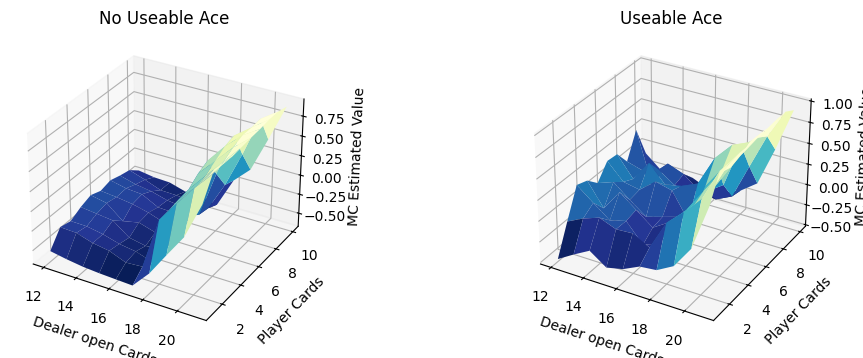

In [25]:
#시각화
X, Y = np.meshgrid(
    np.arange(12, 22),   # player가 가진 카드 합계 (12~21)
    np.arange(1, 11))    # dealer가 공개한 카드 (1~10)

#V[(player의 hand 합계, dealer 공개 카드, 사용 가능한 에이스 보유)]
no_usable_ace = np.apply_along_axis(lambda idx: V[(idx[0], idx[1], False)],
                                    2, np.dstack([X, Y]))
usable_ace = np.apply_along_axis(lambda idx: V[(idx[0], idx[1], True)],
                                 2, np.dstack([X, Y]))

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4),
                               subplot_kw={'projection': '3d'})

ax0.plot_surface(X, Y, no_usable_ace, cmap=plt.cm.YlGnBu_r)
ax0.set_xlabel('Dealer open Cards')
ax0.set_ylabel('Player Cards')
ax0.set_zlabel('MC Estimated Value')
ax0.set_title('No Useable Ace')

ax1.plot_surface(X, Y, usable_ace, cmap=plt.cm.YlGnBu_r)
ax1.set_xlabel('Dealer open Cards')
ax1.set_ylabel('Player Cards')
ax1.set_zlabel('MC Estimated Value')
ax1.set_title('Useable Ace')

plt.show()

In [26]:
win_cnt = 0
lose_cnt =0
draw_cnt = 0
GAMMMA = 1

e = 0.2
num_episodes = 100_000

In [27]:
env = gym.make('Blackjack-v1', sab=True)
num_actions = env.action_space.n

pi = defaultdict(lambda: np.ones(num_actions, dtype=np.float)/num_actions)
Q = defaultdict(lambda: np.zeros(num_actions))
Returns = defaultdict(list)

In [ ]:
for i in range(num_episode):
    episode = []
    s, _ = env.reset()

    while True:
        P = pi[s]
        a = np.random.choice(np.arange(len(P)), p=P)
        s_, r, terminated, truncated, _ = env.step(a)

        episode.append((s, a, r))

        if terminated or truncated:
            if r == 1:
                win_cnt += 1
            elif r == -1:
                lose_cnt += 1
            else:
                draw_cnt += 1
            break
        s = s_

    